In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

import os, json
import glob
import numpy as np
import pandas as pd

import keras
from keras.preprocessing.image import load_img

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Input

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.vgg19 import VGG19


from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from tensorflow.python.keras.models import Model,load_model,Sequential

from tensorflow.python.keras.layers import Dense, GlobalAveragePooling2D, Dropout,Flatten, Input, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.python.keras import backend as K

from tensorflow.keras.callbacks import ModelCheckpoint, Callback


In [0]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/style_images.zip" -d "/content/drive/My Drive/Colab Notebooks"

In [0]:
filenames_n = []

filenames_n.append(glob.glob('/content/drive/My Drive/Colab Notebooks/style_images/claborate/*'))
filenames_n.append(glob.glob('/content/drive/My Drive/Colab Notebooks/style_images/Fuchun/*'))
filenames_n.append(glob.glob('/content/drive/My Drive/Colab Notebooks/style_images/Others/*'))
filenames_n.append(glob.glob('/content/drive/My Drive/Colab Notebooks/style_images/Shanshui/*'))
filenames_n.append(glob.glob('/content/drive/My Drive/Colab Notebooks/style_images/Shuimo/*'))
filenames_n.append(glob.glob('/content/drive/My Drive/Colab Notebooks/style_images/Thinline/*'))
filenames_n.append(glob.glob('/content/drive/My Drive/Colab Notebooks/style_images/Wuguanzhou/*'))
filenames_n.append(glob.glob('/content/drive/My Drive/Colab Notebooks/style_images/Xishan/*'))

names = ['claborate', 'Fuchun','Others','Shanshui','Shuimo','Thinline','Wuguanzhou','Xishan']

#number of classes
num_classes = 8
count = 0
for i in range(len(filenames_n)):
  count += len(filenames_n[i])
print('Total number of images in dataset: {} '.format(count)) 

Total number of images in dataset: 944 


In [0]:
# Make a dataframe based on the filenames
df = pd.DataFrame(filenames_n[0], columns = ["filename"])
df2 = pd.DataFrame(filenames_n[1], columns = ["filename"])
df3 = pd.DataFrame(filenames_n[2], columns = ["filename"])
df4 = pd.DataFrame(filenames_n[3], columns = ["filename"])
df5 = pd.DataFrame(filenames_n[4], columns = ["filename"])
df6 = pd.DataFrame(filenames_n[5], columns = ["filename"])
df7 = pd.DataFrame(filenames_n[6], columns = ["filename"])
df8 = pd.DataFrame(filenames_n[7], columns = ["filename"])

df.head()

,filename
0,/content/drive/My Drive/Colab Notebooks/style_...
1,/content/drive/My Drive/Colab Notebooks/style_...
2,/content/drive/My Drive/Colab Notebooks/style_...
3,/content/drive/My Drive/Colab Notebooks/style_...
4,/content/drive/My Drive/Colab Notebooks/style_...


In [0]:
# Add Class columns 
df['class'] = pd.Series([0 for x in range(len(df.index))], index=df.index)
df2['class'] = pd.Series([1 for x in range(len(df2.index))], index=df2.index)
df3['class'] = pd.Series([2 for x in range(len(df3.index))], index=df3.index)
df4['class'] = pd.Series([3 for x in range(len(df4.index))], index=df4.index)
df5['class'] = pd.Series([4 for x in range(len(df5.index))], index=df5.index)
df6['class'] = pd.Series([5 for x in range(len(df6.index))], index=df6.index)
df7['class'] = pd.Series([6 for x in range(len(df7.index))], index=df7.index)
df8['class'] = pd.Series([7 for x in range(len(df8.index))], index=df8.index)


df.head()

,filename,class
0,/content/drive/My Drive/Colab Notebooks/style_...,0
1,/content/drive/My Drive/Colab Notebooks/style_...,0
2,/content/drive/My Drive/Colab Notebooks/style_...,0
3,/content/drive/My Drive/Colab Notebooks/style_...,0
4,/content/drive/My Drive/Colab Notebooks/style_...,0


In [0]:
df3.head()

,filename,class
0,/content/drive/My Drive/Colab Notebooks/style_...,2
1,/content/drive/My Drive/Colab Notebooks/style_...,2
2,/content/drive/My Drive/Colab Notebooks/style_...,2
3,/content/drive/My Drive/Colab Notebooks/style_...,2
4,/content/drive/My Drive/Colab Notebooks/style_...,2


In [0]:
# Split into train and validation sets
train_set_percentage = .9


train_df = df[:int(len(df)*train_set_percentage)]
val_df = df[int(len(df)*train_set_percentage):]

train_df2 = df2[:int(len(df2)*train_set_percentage)]
val_df2 = df2[int(len(df2)*train_set_percentage):]

train_df3 = df3[:int(len(df3)*train_set_percentage)]
val_df3 = df3[int(len(df3)*train_set_percentage):]

train_df4 = df4[:int(len(df4)*train_set_percentage)]
val_df4 = df4[int(len(df4)*train_set_percentage):]

train_df5 = df5[:int(len(df5)*train_set_percentage)]
val_df5 = df5[int(len(df5)*train_set_percentage):]

train_df6 = df6[:int(len(df6)*train_set_percentage)]
val_df6 = df6[int(len(df6)*train_set_percentage):]

train_df7 = df7[:int(len(df7)*train_set_percentage)]
val_df7 = df7[int(len(df7)*train_set_percentage):]

train_df8 = df8[:int(len(df8)*train_set_percentage)]
val_df8 = df8[int(len(df8)*train_set_percentage):]



df_new_train = pd.concat([train_df, train_df2, train_df3, train_df4, train_df5, train_df6, train_df7, train_df8])
df_new_val = pd.concat([val_df, val_df2, val_df3, val_df4, val_df5, val_df6, val_df7, val_df8])

df_new_train.shape

#shuffle
df = df_new_train.sample(frac=1).reset_index(drop=True)
df_val = df_new_val.sample(frac=1).reset_index(drop=True)

In [0]:
df.head()

,filename,class
0,/content/drive/My Drive/Colab Notebooks/style_...,4
1,/content/drive/My Drive/Colab Notebooks/style_...,6
2,/content/drive/My Drive/Colab Notebooks/style_...,3
3,/content/drive/My Drive/Colab Notebooks/style_...,5
4,/content/drive/My Drive/Colab Notebooks/style_...,1


In [0]:
print(df.shape)
print(df_val.shape)

df['class'].unique()

(845, 2)
(99, 2)


array([4, 6, 3, 5, 1, 7, 2, 0])

6    113
3    113
7    108
5    108
4    108
1    108
0     94
2     93
Name: class, dtype: int64


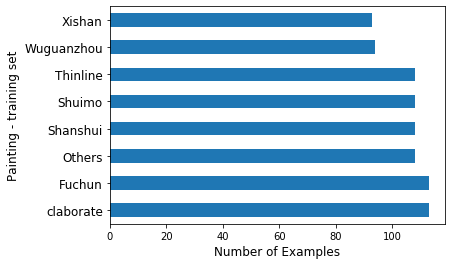

In [0]:
print(df['class'].value_counts())


ax = df['class'].value_counts().plot.barh()
ax.set_xlabel("Number of Examples", fontsize=12)
ax.set_ylabel("Painting - training set", fontsize=12)
ax.set_yticklabels(names, rotation=0, fontsize=12)
plt.show()

In [0]:
# convert the dataframe into 2 lists to use for filename and labels
train_filenames_list = df["filename"].tolist()
train_labels_list = df["class"].astype('int32').tolist()

# convert the dataframe into 2 lists to use for filename and labels
val_filenames_list = df_val["filename"].tolist()
val_labels_list = df_val["class"].astype('int32').tolist()

df.shape

(845, 2)

In [0]:
df_val.shape

(99, 2)

In [0]:
# Reads an image from a file, decodes it into a tensor, and resizes it
# to a fixed shape.
img_rows, img_cols = 512, 512

def _parse_function(filename, label):
  image_string = tf.read_file(filename)
  image_decoded = tf.image.decode_jpeg(image_string,channels=3)
  image_resized = tf.image.resize_images(image_decoded, [img_rows, img_cols])
  label = tf.one_hot(label, num_classes)
  return image_resized, label

In [0]:
# A vector of filenames - from a list
filenames = tf.constant(train_filenames_list)

# Labels that match the training files - from a list
labels = tf.constant(train_labels_list)

# Same as above but for validation set
val_filenames = tf.constant(val_filenames_list)
val_labels = tf.constant(val_labels_list)

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
train_dataset = train_dataset.map(_parse_function)
train_dataset = train_dataset.repeat(100).batch(32)
#train_dataset = train_dataset.batch(32)

In [0]:
valid_dataset = tf.data.Dataset.from_tensor_slices((val_filenames, val_labels))
valid_dataset = valid_dataset.map(_parse_function)
valid_dataset = valid_dataset.repeat(100).batch(32)
#valid_dataset = valid_dataset.batch(32)

In [0]:
train_dataset 

<DatasetV1Adapter shapes: ((?, 512, 512, 3), (?, 8)), types: (tf.float32, tf.float32)>

In [0]:
import numpy as np
from keras.applications import vgg19
def preprocess_image(image_path):
  img = load_img(image_path, target_size=(img_height, img_width))
  img = img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = vgg19.preprocess_input(img)
  return img

def deprocess_image(x):
  x[:, :, 0] += 103.939
  x[:, :, 1] += 116.779
  x[:, :, 2] += 123.68
  x = x[:, :, ::-1]
  x = np.clip(x, 0, 255).astype('uint8')
  return x

In [0]:
# create the base pre-trained model
base_model = tf.keras.applications.vgg19.VGG19(input_shape=(img_rows, img_cols, 3),weights='imagenet',include_top=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
80142336/80134624 [==============================] - 3s 0us/step


In [0]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

In [0]:
# add a global spatial average pooling layer
x = base_model.output

x = Conv2D(512,kernel_size=3,activation='relu',padding='same')(x)
#x = Conv2D(512,kernel_size=3,activation='relu',padding='same')(x)
#x = Conv2D(512,kernel_size=3,activation='relu',padding='same')(x)
#x = MaxPooling2D(padding='same')(x)

#x = Conv2D(512,kernel_size=3,activation='relu',padding='same')(x)
#x = Conv2D(512,kernel_size=3,activation='relu',padding='same')(x)
#x = Conv2D(512,kernel_size=3,activation='relu',padding='same')(x)
x = MaxPooling2D(padding='same')(x)

#x = Conv2D(512,kernel_size=3,activation='relu')(x)
#x = Conv2D(512,kernel_size=3,activation='relu')(x)
#x = Conv2D(512,kernel_size=3,activation='relu')(x)
#x = MaxPooling2D(padding='same')(x)

x = GlobalAveragePooling2D()(x) #Adaptive Pooling

# let's add a fully-connected layer
x = Dense(512, activation='relu')(x)

predictions = Dense(num_classes, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
len(model.layers)

27

In [0]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional VGG16 layers
for layer in base_model.layers:
    #print(layer.name)
    layer.trainable = False

for layer in model.layers:
    print(layer.name)
    print(layer.trainable)

input_1
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_conv4
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_conv4
False
block4_pool
False
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_conv4
False
block5_pool
False
conv2d_2
True
max_pooling2d_2
True
global_average_pooling2d_1
True
dense_2
True
dense_3
True


In [0]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0   

In [0]:
# tf.keras optimizer
opt = optimizers.Adam(lr=0.001)

In [0]:
# compile the model 
model.compile(optimizer= opt, loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
!mkdir checkpoints
checkpoint = ModelCheckpoint('./checkpoints/weights_{epoch:02d}_{val_acc:.2f}.hdf5', verbose=1, save_best_only=True, mode='auto')

mkdir: cannot create directory ‘checkpoints’: File exists


In [0]:
train_steps = 100
val_steps = 100
epochs = 20

In [0]:
# # Train the model with validation 
history = model.fit( train_dataset, steps_per_epoch = train_steps,
                   epochs = epochs,
                   validation_data = valid_dataset,
                   validation_steps = val_steps,
                   callbacks=[checkpoint])

Train on 100 steps, validate on 100 steps
Epoch 1/20
 99/100 [============================>.] - ETA: 1s - loss: 2.0984 - acc: 0.8109
Epoch 00001: val_loss improved from inf to 0.34188, saving model to ./checkpoints/weights_01_0.89.hdf5
100/100 [==============================] - 223s 2s/step - loss: 2.0778 - acc: 0.8128 - val_loss: 0.3419 - val_acc: 0.8894
Epoch 2/20
 99/100 [============================>.] - ETA: 1s - loss: 0.0172 - acc: 0.9991
Epoch 00002: val_loss improved from 0.34188 to 0.20975, saving model to ./checkpoints/weights_02_0.93.hdf5
100/100 [==============================] - 221s 2s/step - loss: 0.0171 - acc: 0.9991 - val_loss: 0.2097 - val_acc: 0.9300
Epoch 3/20
 99/100 [============================>.] - ETA: 1s - loss: 0.0055 - acc: 1.0000
Epoch 00003: val_loss did not improve from 0.20975
100/100 [==============================] - 222s 2s/step - loss: 0.0055 - acc: 1.0000 - val_loss: 0.3017 - val_acc: 0.9200
Epoch 4/20
 99/100 [============================>.] - ETA:

In [0]:
!ls checkpoints

weights_01_0.57.hdf5  weights_02_0.86.hdf5
weights_01_0.89.hdf5  weights_02_0.93.hdf5


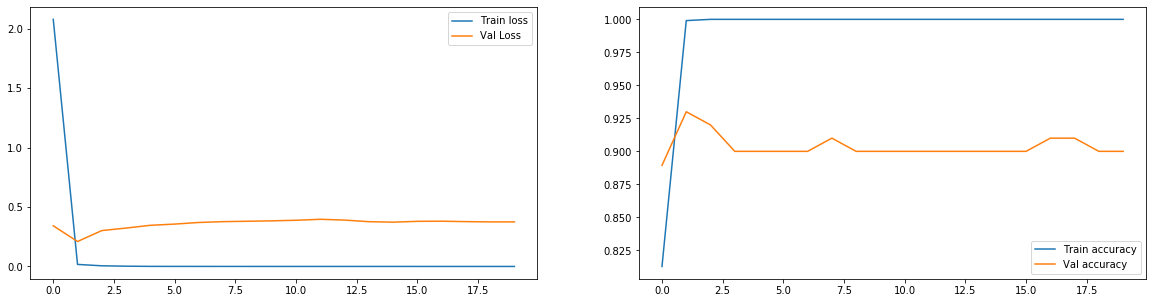

In [0]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Val accuracy')
plt.legend();

In [0]:
preds = model.predict(valid_dataset,steps=3)
preds = preds.argmax(axis=-1)

preds.shape

(96,)

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
test_labels = val_labels_list[0:96]
cm = confusion_matrix(test_labels,preds)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Normalized confusion matrix
[[0.90909091 0.         0.         0.         0.         0.
  0.         0.09090909]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.07692308 0.         0.         0.84615385 0.         0.
  0.         0.07692308]
 [0.         0.         0.         0.2        0.8        0.
  0.         0.        ]
 [0.         0.07692308 0.         0.         0.         0.92307692
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]]


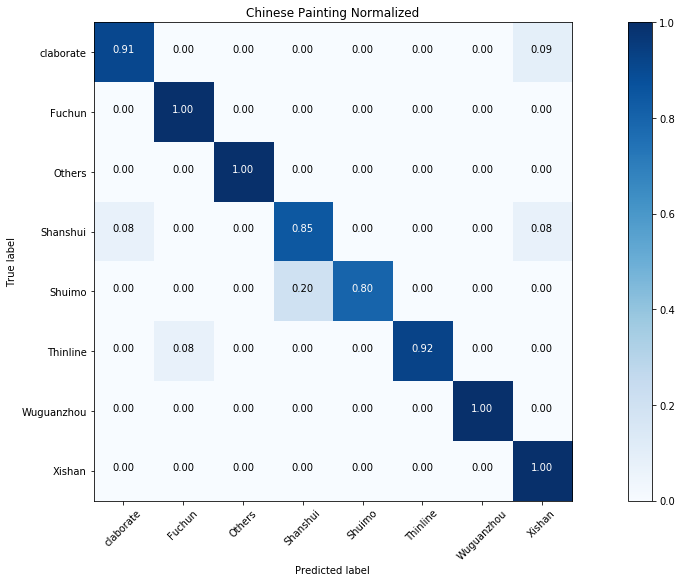

In [0]:
cm_plot_labels = names

# # Plot normalized confusion matrix
plt.figure(figsize=(16,8))
plot_confusion_matrix(cm, cm_plot_labels, normalize=True,
                      title='Chinese Painting Normalized')

plt.show()

The accuracy of the model is within accetable range, especially when the final use of the model is for style transfer and not for classification. 

In [0]:
model.load_weights('./checkpoints/weights_02_0.93.hdf5')
model.save('/content/drive/My Drive/Colab Notebooks/TL_Trained_Model/vgg19_1_model.h5')

In [0]:
model.save_weights('/content/drive/My Drive/Colab Notebooks/TL_Trained_Model/vgg19_1_weight.h5', save_format='h5')